Assignment 3

Complementary Slackness,
Kernel Function: Half Circle and Moon Dataset,
Multi Layer Perceptron

Problem 1--Complementary Slackness--
'Complementay slackness' is crucial in finding and understanding an optimal solution subject to conditions for the primal problem and dual problem.
Complementary Slackness will be explained in the context of SVM optimization problem where it helps identify which of the constraints are active therby identifying the support vectors

Primal form of the SVM problem


$$ \min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} \xi_i \quad \text{subject to} \quad y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \quad \text{for all } i $$

Above, $x_i$ and $y_i$ are the feature vectors and labels of our training examples, $\xi_i$ are the slack variables allowing for misclassification of difficult or noisy examples, C is the regularization parameter, w is the weight vector, and b is the bias.


The dual problem is derived from the above primal problem using the Lagrangian. The dual problem is: 

$$ \max_{\alpha}  \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i, j=1}^m y_i y_j \alpha_i \alpha_j (x_i^T x_j) \quad \text{subject to} \quad \sum_{i=1}^m \alpha_iy_i = 0 \quad \text{and} \quad 0 \leq \alpha_i \leq C \quad \text{for all i} $$

Above, $\alpha_i$ is Lagrange multiplier.


Now, that we have the primal and dual problem we can go through the complementary slackness conditions. The last condition perfectly explains complementary slackness, if $\alpha_i$ equals zero correctly classified and the constraint is considered "slack" which means it is not binding. If you relaxed it, it would not change the objective function. The constraint is not actually binding because without the constraint, the solution is still chosen.
For each training example i the complementary slackness conditions: 
$$1. \quad \xi_i(C-\alpha_i) = 0$$ $$2. \alpha_i * g(w) = 0$$

The conditions imply:  $$\quad 1. \quad \xi_i > 0 \quad \text{then training example i within margin or not classified correctly}$$ $$\quad \alpha_i=C \quad \text{then example is support vector}$$ and $$\quad 2. \quad \text{if} \quad \alpha_i * g(w) = 0 $$then example is not binding because $\alpha_i$ must equal zero and we are interested in it in regards to complementary slackness because of the relation $\alpha_i * g(w) =0$ If $\alpha_i$ > 0 then the constraint is binding meaning relaxing would change the objective function.


Now, that we have the foundation done we can consider an example using 2D data:
Consider these data points and labels using 2D data:$$(x_i,y_i)=$$ $$((1,2),1)$$ $$((2,3),1)$$ $$((3,3),-1)$$ $$ ((4,1),-1)$$ $$((1, 1.5),1)$$ $$((2.5,3.5),1)$$ $$((3.5,2),-1)$$ $$((1.5,2.5),-1)$$

First, we will formulate the primal problem as we did above, but now we are using the 2D data example:
$$ \min_{w, b} \frac{1}{2} \|w\|^2 + C(\xi_1 + \xi_2 + \xi_3 + \xi_4 + \xi_5 + \xi_6 +\xi_7 + \xi_8)$$ subject to: 
$$1(w_1 * 1 + w_2 * 2 + b) \geq 1 - \xi_1, \quad \xi_1 \geq 0$$ $$1(w_1 * 2 + w_2 * 3 + b) \geq 1 - \xi_2, \quad \xi_2 \geq 0$$  $$-1(w_1 * 3 + w_2 * 3 + b) \geq 1 - \xi_3, \quad \xi_3 \geq 0$$ $$-1(w_1 * 4 + w_2 * 1 + b) \geq 1 - \xi_4, \quad \xi_4 \geq 0$$ $$1(w_1 * 1 + w_2 * 1.5 + b) \geq 1 - \xi_5, \quad \xi_5 \geq 0$$ $$1(w_1 * 2.5 + w_2 * 3.5 + b) \geq 1 - \xi_6, \quad \xi_6 \geq 0$$ $$-1(w_1 * 3.5 + w_2 * 2 + b) \geq 1 - \xi_7, \quad \xi_7 \geq 0$$ $$-1(w_1 * 1.5 + w_2 * 2.5 + b) \geq 1 - \xi_8, \quad \xi_8 \geq 0$$

Next, following our foundation above we will formulate the dual problem using our 2D data example:
$$ \max_{\alpha}  \sum_{i=1}^8 \alpha_i - \frac{1}{2} \sum_{i=1, j=1}^8 y_i y_j \alpha_i \alpha_j (x_i^T x_j)$$ subject to:  $$0 \leq \alpha_i \leq C, \quad \sum_{i=1}^8 y_i \alpha_i = 0$$

Now, we will use a quadratic solver to find our optimal values for $\alpha_i$ and examine the complementary slackness conditions for each of the data points in our 2D example



Alpha values (alphas) for each data point:
Data point [1. 2.]: alpha = 0.0
Data point [2. 3.]: alpha = 0.8461538461538463
Data point [3. 3.]: alpha = -1.0
Data point [4. 1.]: alpha = 0.0
Data point [1.  1.5]: alpha = 0.46153846153846156
Data point [2.5 3.5]: alpha = 1.0
Data point [3.5 2. ]: alpha = -0.3076923076923077
Data point [1.5 2.5]: alpha = -1.0


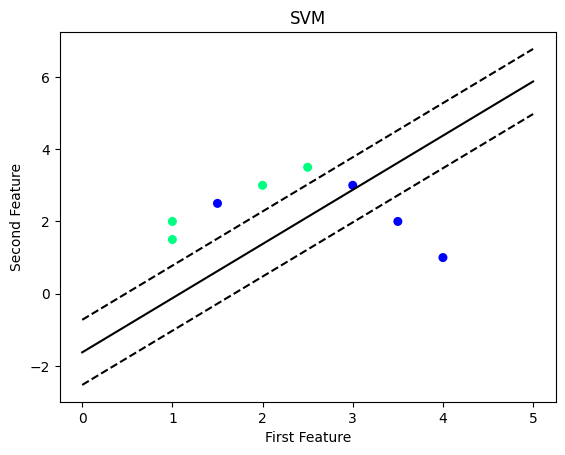

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array([[1, 2], [2, 3], [3, 3], [4, 1], [1, 1.5], [2.5, 3.5], [3.5, 2], [1.5, 2.5]]) #2D dataset
y = np.array([1, 1, -1, -1, 1, 1, -1, -1]) #labels
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y) #training the SVM model
alphas = np.zeros(len(y)) #initialize lagrange multiplier
support_indices = clf.support_#indices of support vectors
dual_coefs = clf.dual_coef_.flatten() #convert lagrange multipliers 
alphas[support_indices] = dual_coefs #assign lagrange multiplies to indices


print("Alpha values (alphas) for each data point:")
for i, (point, alpha) in enumerate(zip(X, alphas)):
    print(f"Data point {point}: alpha = {alpha}") #print lagrange values with datapoints


def plot_svm_sklearn(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter') #plot data and decision boundaries
    x_plot = np.linspace(0, 5, 100) #range for boundary and margin on x axis 
    y_plot = -(w[0] * x_plot + b) / w[1]  #equation for calc y values for boundary
    margin = 1 / np.linalg.norm(w) #calc margin width
    gutter_up = y_plot + margin #calc upper margin
    gutter_down = y_plot - margin #calc lower margin
    
    plt.plot(x_plot, y_plot, 'k-')
    plt.plot(x_plot, gutter_up, 'k--')
    plt.plot(x_plot, gutter_down, 'k--') #plot decision boundary and margins
    plt.xlabel("First Feature")
    plt.ylabel("Second Feature")
    plt.title("SVM")
    plt.show() #plot labels
plot_svm_sklearn(X, y, clf)


Problem 2 --SVM Kernels Half Circle and Moon Dataset--

CV Accuracy Moons dataset: {'linear': 0.8618233618233618, 'poly': 0.8988603988603988, 'rbf': 0.9871794871794872, 'sigmoid': 0.6996676163342831}
Cv Accuracy Circles dataset: {'linear': 0.4128679962013295, 'poly': 0.46225071225071224, 'rbf': 1.0, 'sigmoid': 0.4128679962013295}
Time for SVM: 0.0019669532775878906


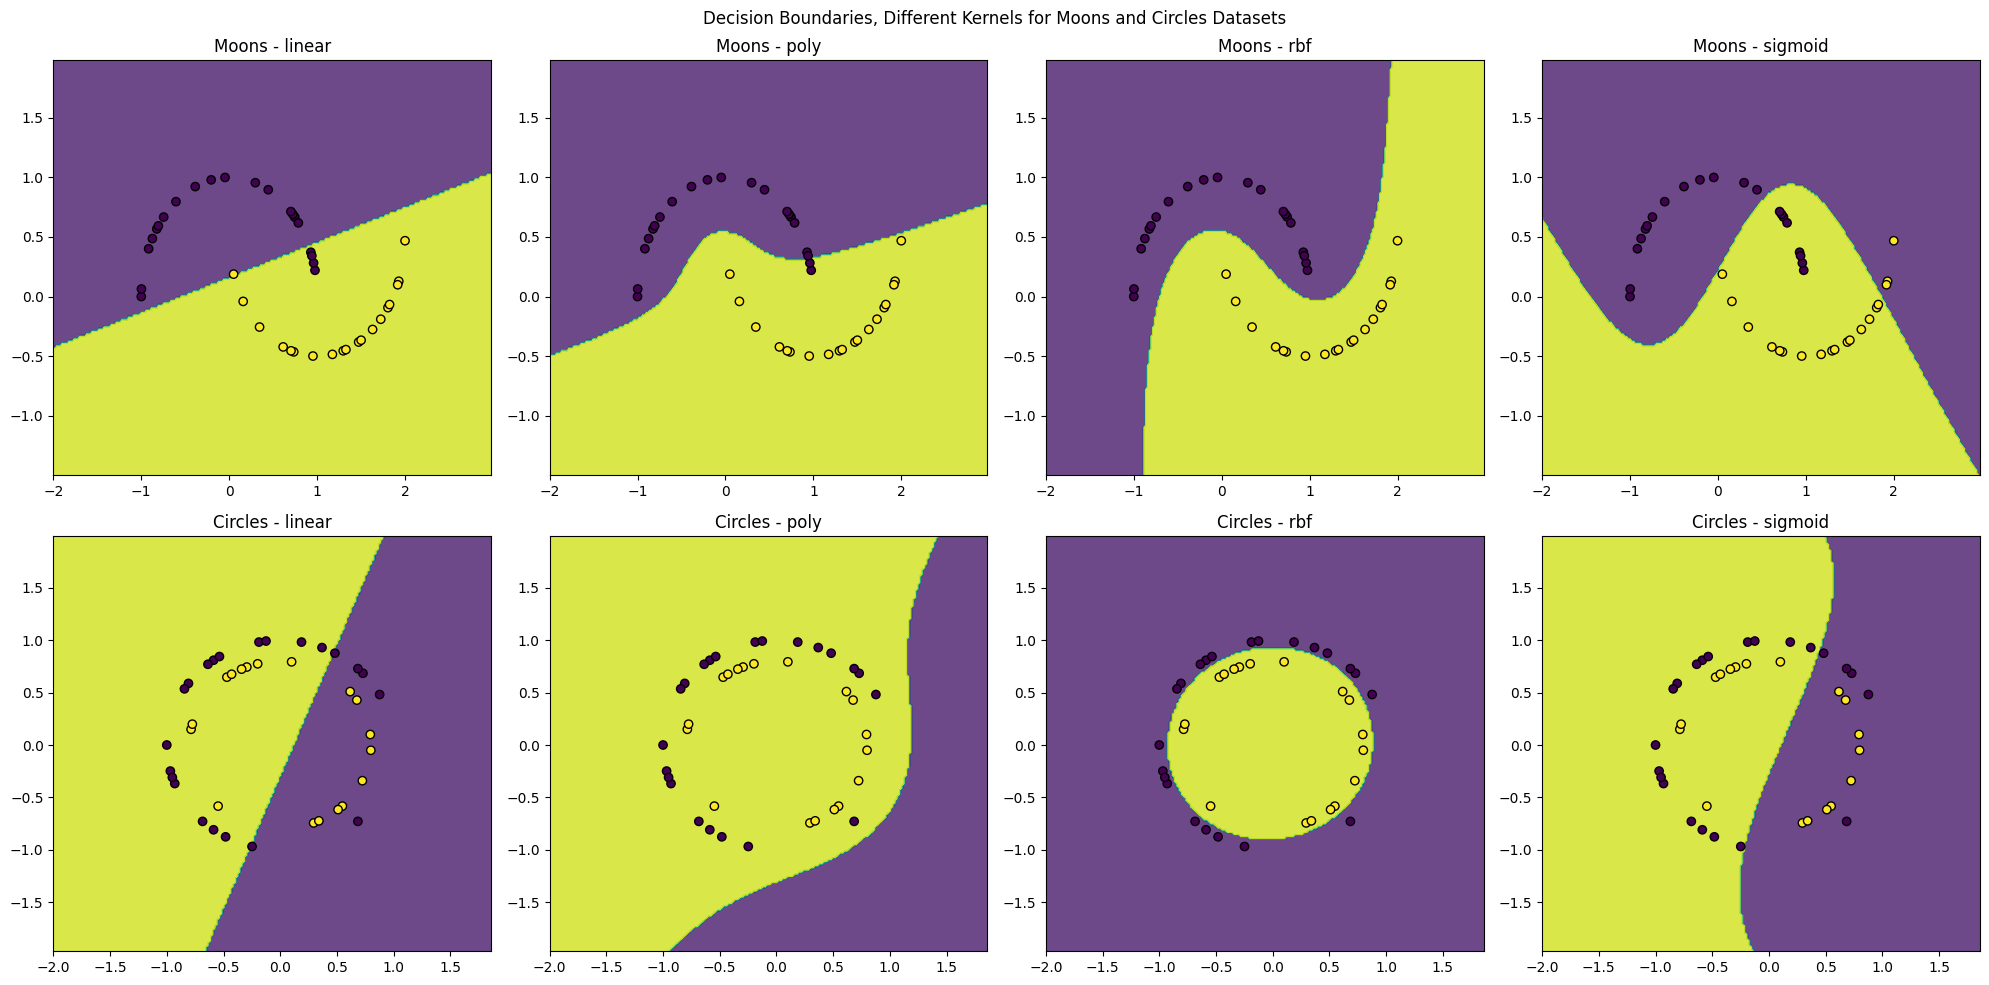

Best kernel for Moons dataset: rbf
Best kernel for Circles dataset: rbf


In [247]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
X_moons, y_moons = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None) #load moon data with parameters given in assignment
X_circles, y_circles = make_circles(n_samples=200, noise=None, factor=0.8, random_state=None) #load circle data with parameters given in assignment
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42) #split moon data in train/test 80-20 ratio
X_circles_train, X_circles_test, y_circles_train, y_circles_test = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42) #split circle data in train/test 80-20 ratio

kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #assign the kernels
moons_model = {} #initialize
circles_model = {} #initialize
accuracies_moons = {} #initialize
accuracies_circles = {} #initialize
svm_training_time = {} #initialize
kf = KFold(n_splits=6, shuffle=True, random_state=42) #def Kfold cv parameters
for kernel in kernels: #train SVM using the kernels
    svm_moons = SVC(kernel=kernel, gamma='auto') #initialize moon using current kernel
    svm_circles = SVC(kernel=kernel, gamma='auto') #initialize circles using current kernel
    moons_cv_scores = cross_val_score(svm_moons, X_moons_train, y_moons_train, cv=kf) #cv score moons
    circles_cv_scores = cross_val_score(svm_circles, X_circles_train, y_circles_train, cv=kf) #cv scores circles
    start = time.time() #start time
    svm_moons.fit(X_moons_train, y_moons_train) #fit SVM on moon
    svm_training_time = time.time() - start #end time
    start = time.time() #start time
    svm_circles.fit(X_circles_train, y_circles_train) #fit SVM on circles
    svm_training_time = time.time() - start #end time
    moons_model[kernel] = svm_moons #store moons trained SVM 
    circles_model[kernel] = svm_circles #store circles trained SVM
    accuracies_moons[kernel]=np.mean(moons_cv_scores) #calc avg moons cv scores
    accuracies_circles[kernel]=np.mean(circles_cv_scores) #calc avg circles cv scores

print("CV Accuracy Moons dataset:",accuracies_moons)
print("Cv Accuracy Circles dataset:",accuracies_circles)
print("Time for SVM:", svm_training_time)

def plot_decision_boundary(X, y, model, ax): #def func for decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #x range for grid
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #y range for grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) #meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict class for datapoints
    Z = Z.reshape(xx.shape) 
    ax.contourf(xx, yy, Z, alpha=0.8) #plot decision boundary
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o') #scatter plot 
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max()) #assign limits
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Decision Boundaries, Different Kernels for Moons and Circles Datasets') #figure w subplot

for i, kernel in enumerate(kernels): #plot bondareis on each kernel
    plot_decision_boundary(X_moons_test, y_moons_test, moons_model[kernel], axes[0, i])
    axes[0, i].set_title(f'Moons - {kernel}') #plot moons boundary
    plot_decision_boundary(X_circles_test, y_circles_test, circles_model[kernel], axes[1, i])
    axes[1, i].set_title(f'Circles - {kernel}') #plot circles boundary
plt.tight_layout()
plt.show()

best_kernel_moons = max(accuracies_moons, key=accuracies_moons.get) #pick best moons kernel 
best_kernel_circles = max(accuracies_circles, key=accuracies_circles.get) #pick best circles kernel

print("Best kernel for Moons dataset:", best_kernel_moons)
print("Best kernel for Circles dataset:", best_kernel_circles)


Explanation of solution: In this explanation we will discuss the CV accuracy scores for each dataset and kernel. Linear kernel for moons had a score of 0.86 which is pretty good, linear kernels are the simplest and work by compputing the dot product ($w^Tx$) between vectors. In the case of the circles dataset, linear kernel had a score of 0.41 and did not perform as well because the dataset is not linearly seperable. Polynomial kernel for moons scored at 0.89 which is also pretty good; the polynomial kernel works by raising the dot product to a power which helps introduce nonlinearity. As you can see in the subplots the line is no longer straight. In the case of the circles dataset, polynomial kernel scored 0.46 which is not that good. The sigmoid kernel works by mapping the data to a sigmoid curve. The performance for moons dataset was 0.7 and for circles was 0.41. Now, let us talk about the winner, the radial basis function kernel, or rbf, calculates how close two points are to each other and creates a non linear smooth boundary. Rbf is commonly used in svm for non-linear datasets and in our case for the moons dataset scored almost perfectly at 0.98 and in the circles dataset scored perfectly at 1.0. Having tested the performance of each kernel function and plotting the decision boundaries, we can see that for both moons and circles dataset, the radial basis function kernel is best suited for classifying these datasets.It makes sense that the rbf kernel scored perfectly for the circles and near perfect for the moon becuase it is well suited for non linear data.

Problem 3 --Multilayer Perceptron Half Circles and Moons Dataset--

CV Accuracy Moons: 1.0
CV Accuracy Circles: 1.0
Time for MLP: 1.3043665885925293


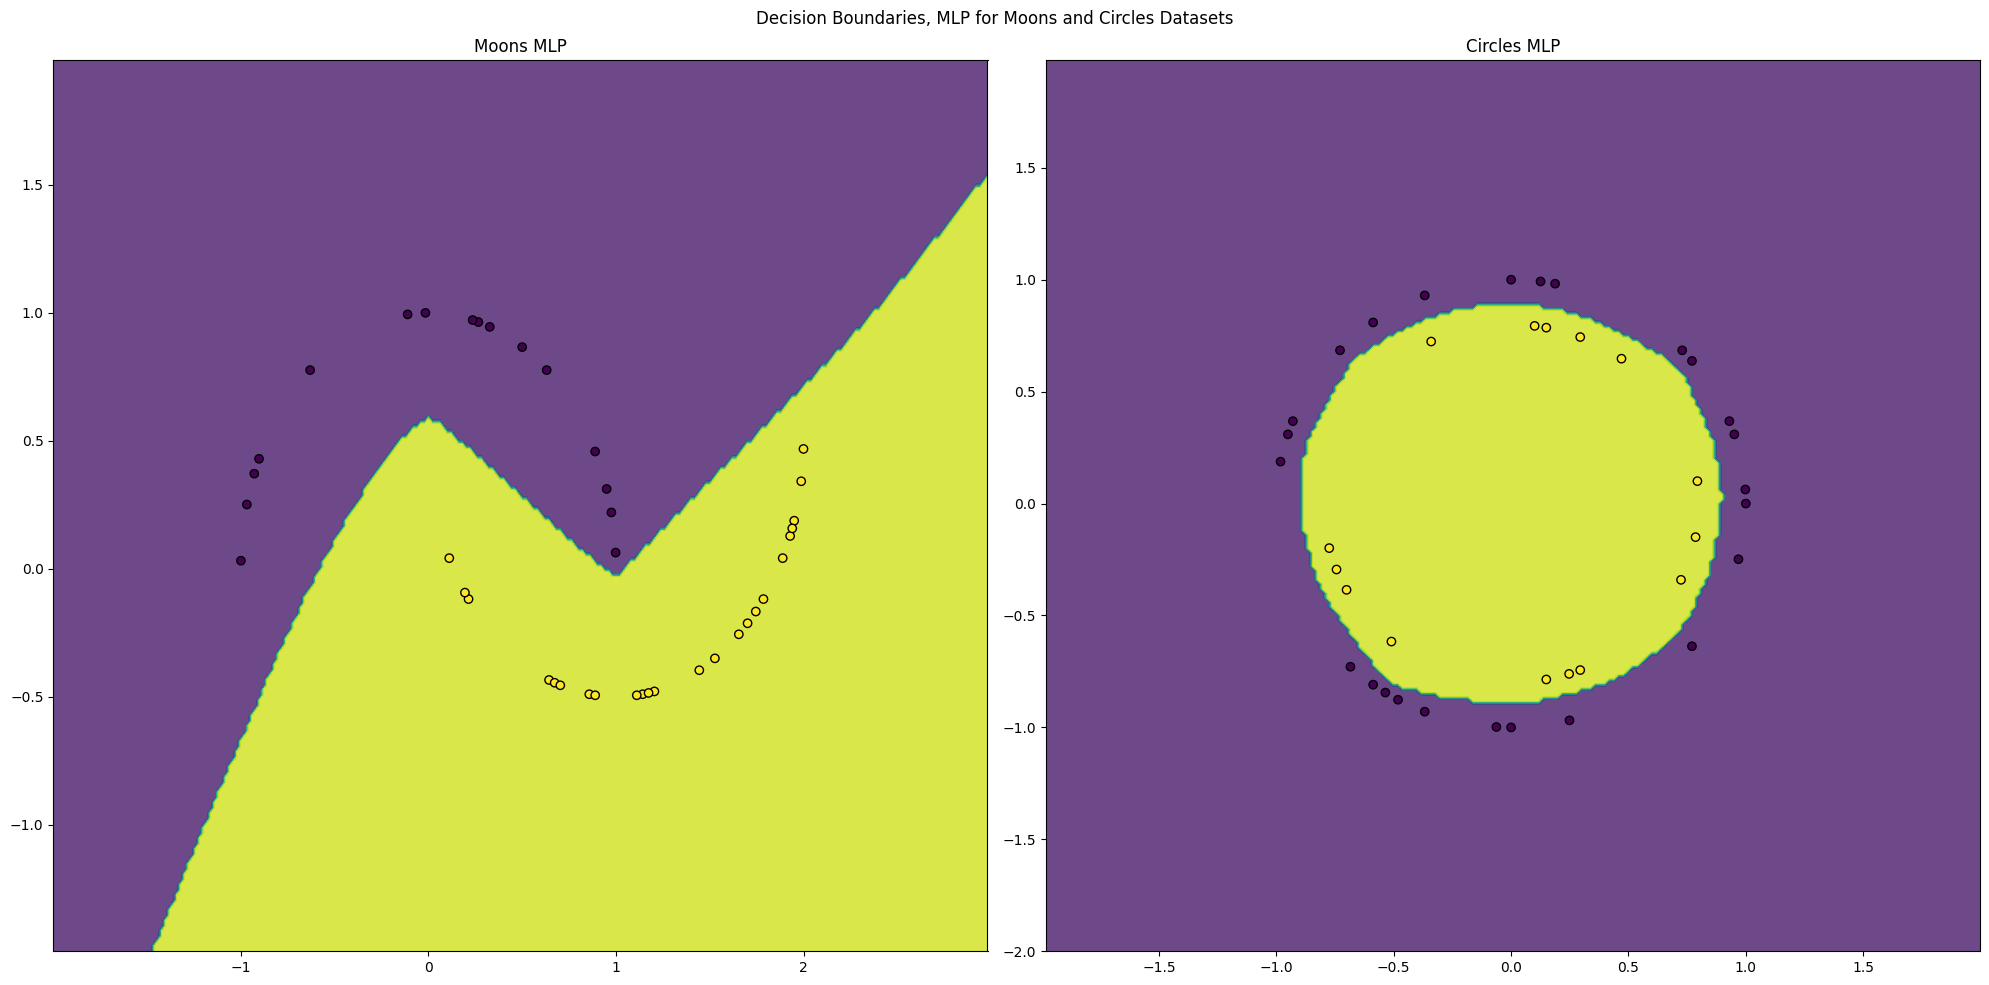

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
X_moons, y_moons = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None) #load moon data with parameters given in assignment
X_circles, y_circles = make_circles(n_samples=200, noise=None, factor=0.8, random_state=None) #load circle data with parameters given in assignment
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42) #split moon data in train/test 80-20 ratio
X_circles_train, X_circles_test, y_circles_train, y_circles_test = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42) #split circle data in train/test 80-20 ratio

parameters_mlp ={'hidden_layer_sizes':(100,),'max_iter':2000,'activation':'relu','solver':'adam','random_state':42} #set parameters for MLP classifier deafault used for hidden layers (1 layer 100 neurons), activation, optimizer, iters inc until convergence 
moons_model = {} #initialize moons
circles_model = {} #initialize circles
mlp_training_time = {} #initialize time
kf = KFold(n_splits=6, shuffle=True, random_state=42) #def Kfold cv parameters

mlp_moons = MLPClassifier(**parameters_mlp) #initialize mlp moons w parameters
mlp_circles = MLPClassifier(**parameters_mlp) #initialize mlp circles w parameters
moons_cv_scores = cross_val_score(mlp_moons, X_moons_train, y_moons_train, cv=kf) #calc/store cv score moons
circles_cv_scores = cross_val_score(mlp_circles, X_circles_train, y_circles_train, cv=kf,) #calc/store cv scores circles
start = time.time() #start time
mlp_moons.fit(X_moons_train,y_moons_train) #train mlp
mlp_training_time = time.time() - start #end time
start = time.time() #start time
mlp_circles.fit(X_circles_train,y_circles_train) #train mlp
mlp_training_time = time.time() - start #end time
moons_model['mlp'] = mlp_moons #store trained
circles_model['mlp'] = mlp_circles #store trained
accuracies_moons = np.mean(moons_cv_scores) #calc avg moons cv accuracy scores
accuracies_circles = np.mean(circles_cv_scores) #calc avg circles cv accuracy scores

print("CV Accuracy Moons:", accuracies_moons)
print("CV Accuracy Circles:", accuracies_circles)
print("Time for MLP:", mlp_training_time)

def plot_decision_boundary(X, y, model, ax): #def func for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #x range for grid
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #y range for grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))  #meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict class for datapoints
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8) #plot decision boundary
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o') #scatter plot 
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max()) #assign limits
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Decision Boundaries, MLP for Moons and Circles Datasets')
plot_decision_boundary(X_moons_test, y_moons_test, moons_model['mlp'], axes[0])
axes[0].set_title('Moons MLP') #plot moons decision boundary 
plot_decision_boundary(X_circles_test, y_circles_test, circles_model['mlp'], axes[1])
axes[1].set_title('Circles MLP') #plot circles decision boundary
plt.tight_layout()
plt.show()

Rational behind training process and design parameters for MLP: The synthetic datasets used from skickit learn were "make_moons" and "make_circles". The datasets were then split, using an 80-20 ratio into training and testing data. The model was initialized using MLPClassifier from scikit learn which is a neural network library capable of handling and learning non-linear data. This library includes choices for layers, iteration, activation functions, optimizers, and much more. Its ease of use and robustness makes building MLP models very efficient and effective. In this case, 1 hidden layer with 100 neurons was used to avoid underfitting or overfitting with many neurons and hidden layers. The number of iterations used was 1000, this number was chosen based on ability to converge. I began with using 200 and this was not enough for the modle to converge onto a solution, after testing a few different iterations, convergence was achieved with 2000 iterations. The default activation function "relu" was used for the hidden layer, it returns f(x) = max (0,x) and helps the model to train faster. The default optimizer "adam" was used because it is a robust stochastic gradient descent based optimizer. Random state = 42 was chosen because this helps reproducibility and is standard use in practice. The model was trained using fit which updates the weights and bias of the model during training. K-Fold cross validation was used for evaluation metrics because it splits the data into multiple sets, in this case 6 splits, and this evaluates across iterations which gives an idea to the generalizability of the model. Specifically, the accuracy score was used to evaluate performance because this is a classification problem and we are trying to see how well the model classified the data correctly. For the moons dataset it had a score of 1.0 and for the circles dataset it had a score of 1.0. Lastly, the model was plotted to help visualizze how well it is learning and classifying the datasets.

Comparison of the computational cost of SVM and MLP models: The computational cost Time for SVM: 0.0019669532775878906 and Time for MLP: 1.3043665885925293. I think this makes sense because SVM has about O(n^3) complexity and the time complexity of MLP depends on many factors such as how many neurons, layers, number of epochs, and backpropogation. Therefore, the MLP was more accurate but the computational cost is higher due to the many complexities of the network. Another thing i noticed was as the number of data points increases, accuracy improved but the computational cost increased.